<a href="https://colab.research.google.com/github/tarun422/AirBnb-Data-Analysis/blob/main/AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project - AirBnb Booking Analysis**

##**Project Type** - EDA
##**Contribution** - Individual
##**Name** - Tarun

#**Project Summary**



write your summary

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer here

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#This '%matplotlib inline' use to show the chart just below the cell 

%matplotlib inline

### Dataset Loading

In [2]:
# Mounting Drive

# Load DataSet from my googlr drive which is also present in your side

anb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [3]:
# Top view of dataset

anb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# No. of Rows and Column

anb_df.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Information

anb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Check Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# There is no Duplicate values

len(anb_df[anb_df.duplicated()])

0

## ***2. Understanding Your Variables***


In [7]:
# DataSet Columns

list(anb_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

* **id:**It's a property id
* **name:**It's a name of the property
* **host_id:**It's a host id who register on AirBnb
* **host_name:**Name of the host who register on AirBnb
* **neighbourhood_group:**Name of the neighbourhood group
* **neighbourhood:**Name of the neighbourhood present in group
* **latitude:**Latitude of property
* **longitude:**longitude of property
* **room_type:**Different types of room
* **price:**Rent of the property
* **minimum_nights:**Minmum number of night spend by customer
* **number_of_reviews:**Number of customer reviews
* **calculated_host_listings_count:**Number of listing done by host
* **availability_365:**Represent the number of days when property is available


#**3. Handling Missing/Null Values**

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

print(anb_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


####Drop Column Which Contain Large Number Of Null Values

In [9]:
# Drop the column of last_rewiew and reviews_per_month by reverse indexing

anb_df.drop(anb_df.columns[[-3,-4]],axis=1,inplace=True)

In [10]:
# Check the column is drop or not

print(anb_df.isnull().sum())

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


### Fixing null values by replacing them with dummy string : 'No_Values'

In [11]:
# Replacing nan values
# Inplace apply the changes on Orignal DataSet

anb_df.replace(np.nan,'No_Values',inplace=True)

In [12]:
#Check that all values are notNull or not

print(anb_df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [13]:
# count all notNull values

anb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

# **4. Let's Start Analysing the DataSet With Graphical Representation**

In [14]:
# DataSet Describe

anb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [16]:
# Columns with Numarical values

numarical_columns=anb_df[['id','host_id','latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

#### Handling Outliers


In [38]:
# Calculate the median of the price

anb_df['price'].median()

106.0

In [39]:
# There are some very less price values which may be not accurate 
# Replace these values with median of price

anb_df.loc[anb_df['price']<20,'price']=anb_df['price'].median()

In [40]:
# chech there is any value left or not

anb_df.loc[anb_df['price']<20,'price']

Series([], Name: price, dtype: int64)

In [17]:
# let's take a look of dataset using loc method

anb_df.loc[[0,1]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


In [18]:
# Count the neighbourhood groups

neighbourhood_group_count=dict(anb_df.groupby(['neighbourhood_group']).size())
neighbourhood_group_count

{'Bronx': 1091,
 'Brooklyn': 20104,
 'Manhattan': 21661,
 'Queens': 5666,
 'Staten Island': 373}

In [19]:
# assign axis values to plot graph
neighbourhood_group_x_axis=neighbourhood_group_count.keys()
neighbourhood_group_y_axis=neighbourhood_group_count.values()

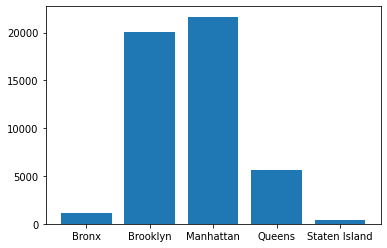

In [20]:
# Plot a Bar graph of number of neighbourhood groupsusing Matplotlib 

plt.bar(neighbourhood_group_x_axis,neighbourhood_group_y_axis)
plt.show()

In [21]:
neighbourhood_counts=dict(anb_df.groupby(['neighbourhood']).size().sort_values(ascending=False))
neighbourhood_counts

{'Williamsburg': 3920,
 'Bedford-Stuyvesant': 3714,
 'Harlem': 2658,
 'Bushwick': 2465,
 'Upper West Side': 1971,
 "Hell's Kitchen": 1958,
 'East Village': 1853,
 'Upper East Side': 1798,
 'Crown Heights': 1564,
 'Midtown': 1545,
 'East Harlem': 1117,
 'Greenpoint': 1115,
 'Chelsea': 1113,
 'Lower East Side': 911,
 'Astoria': 900,
 'Washington Heights': 899,
 'West Village': 768,
 'Financial District': 744,
 'Flatbush': 621,
 'Clinton Hill': 572,
 'Long Island City': 537,
 'Prospect-Lefferts Gardens': 535,
 'Park Slope': 506,
 'East Flatbush': 500,
 'Fort Greene': 489,
 'Murray Hill': 485,
 'Kips Bay': 470,
 'Flushing': 426,
 'Ridgewood': 423,
 'Greenwich Village': 392,
 'Sunset Park': 390,
 'Chinatown': 368,
 'Sunnyside': 363,
 'SoHo': 358,
 'Prospect Heights': 357,
 'Morningside Heights': 346,
 'Gramercy': 338,
 'Ditmars Steinway': 309,
 'Theater District': 288,
 'South Slope': 284,
 'Nolita': 253,
 'Inwood': 252,
 'Gowanus': 247,
 'Elmhurst': 237,
 'Woodside': 235,
 'Carroll Gardens

In [22]:
neighbourhood_x_axis=list(neighbourhood_counts.keys())[:6]
neighbourhood_y_axis=list(neighbourhood_counts.values())[:6]

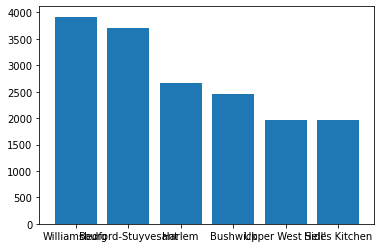

In [23]:
plt.bar(neighbourhood_x_axis,neighbourhood_y_axis)
plt.show()

In [24]:
xyz=dict(anb_df.groupby(['host_name']).size().sort_values(ascending=False))

In [25]:
xyzx=list(xyz.keys())[:6]
xyzy=list(xyz.values())[:6]
print(xyzx)
print(xyzy)

['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground']
[417, 403, 327, 294, 279, 232]


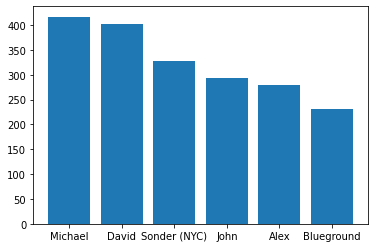

In [26]:
plt.bar(xyzx,xyzy)
plt.show()

In [27]:
hj=anb_df.groupby(['room_type']).size()
hj

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

In [28]:
anb_df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,1,23
